In [ ]:
"""
Created on Thur Jul  7 16:20:39 2022

@author: Junhyun
"""

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def MAPE_regression(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

# KNN (Regression)
def knnRegressor(x_train, y_train, x_test, y_test, n_neighbors=3):
    '''
        @Input 
            trainX : type : array
            trainY : type : array
            testX : type : array
            n_neighbors : type : int
        @Output
            pred : type : array
    '''
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    MSE = mean_squared_error(y_test, y_pred)#MSE 값은 출력하지 않아도 됩니다. RMSE를 구하기 위한 절차입니다.    

    #출력 대상입니다. 성능지표로써 3가지값이 출력되게 됩니다.
    RMSE = np.sqrt(MSE)
    MAPE = MAPE_regression(y_test,y_pred)
    R_squared = r2_score(y_test,y_pred)

    return({"y_pred":y_pred, "RMSE":RMSE, "MAPE":MAPE, "R_squared":R_squared})

regdat = pd.read_csv('E:\\연구실\\연구과제\\엑센솔루션\\py\\data\\regression\\RMS_bearing.csv')

train_x = regdat.values[0:500,0:3]
train_y = regdat.values[0:500,3]
test_x = regdat.values[500:983,0:3]
test_y = regdat.values[500:983,3]

knn = knnRegressor(x_train, y_train, x_test, y_test, n_neighbors=3)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import joblib

# KNN (Classification)
def knnClassifier(x_train, y_train, x_test, y_test, n_neighbors=3):
    '''
    @Input 
        trainX : type : array
        trainY : type : array
        testX : type : array
        n_neighbors : type : int
    @Output
        pred : type : array
    '''
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(x_train, y_train)
    
    # KNN 모델 Pickle 파일로 저장 (경로 따로 설정 필요)
    saveModel = joblib.dump(model, "model.pkl")
    
    y_pred = model.predict(x_test) # 불량 : 1, 정상 : 0
    
    # calculate AUC of model
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    return({"auc_score": auc, "fpr":fpr, "tpr":tpr})

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/workspace/xnsolution/data/사출6호기테스트.csv', encoding='euc-kr', header=None)

trainX = df.iloc[:,7:9]
trainY = df.iloc[:,0]
testX = df.iloc[:,7:9]
testY = df.iloc[:,0]

In [4]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=3)

In [5]:
pred_prob = model.predict_proba(testX)

In [14]:
testY.value_counts()

0    3231
1       2
Name: 0, dtype: int64

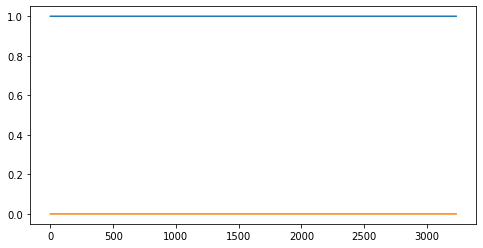

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(pred_prob)
plt.show()

In [ ]:
y_pred = model.predict(x_test) # 불량 : 1, 정상 : 0